In [2]:
import numpy as np
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table

In [3]:
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay
roc_curve = RocCurveDisplay.from_estimator

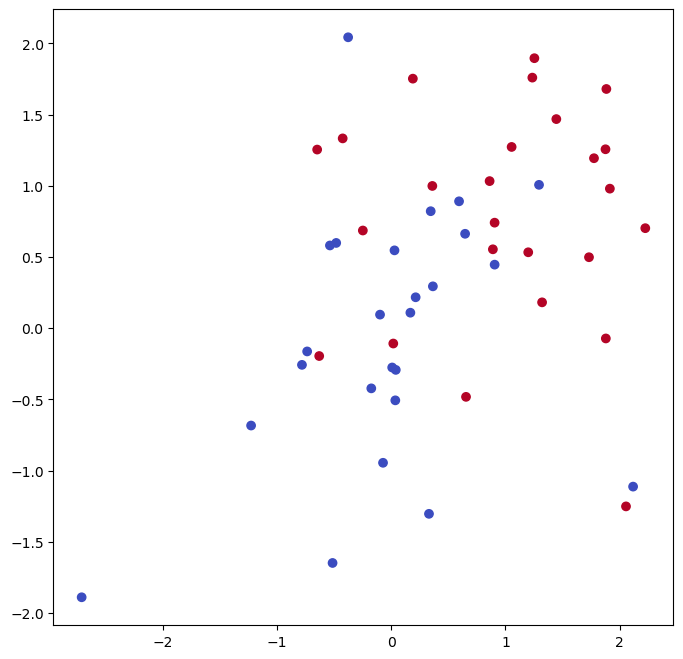

In [4]:
#generate test samples
rng = np.random.default_rng(1)
X = rng.standard_normal((50,2))
y = np.array([-1]*25+[1]*25)
X[y==1] += 1
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],
           X[:,1],
           c=y,
           cmap=cm.coolwarm)

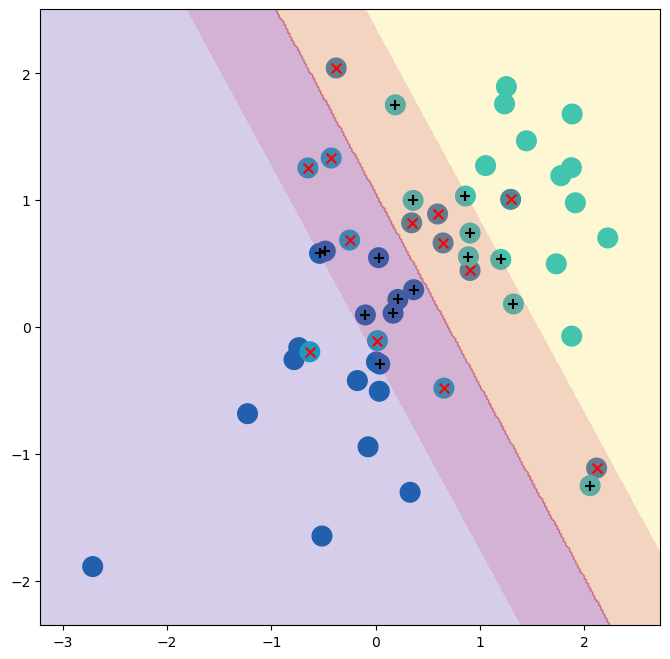

In [5]:
#Support Vector C
svm_linear = SVC(C=10, kernel='linear')

svm_linear.fit(X, y)

fig, ax = subplots(figsize=(8,8))
plot_svm(X, 
         y,
         svm_linear,
         ax=ax)

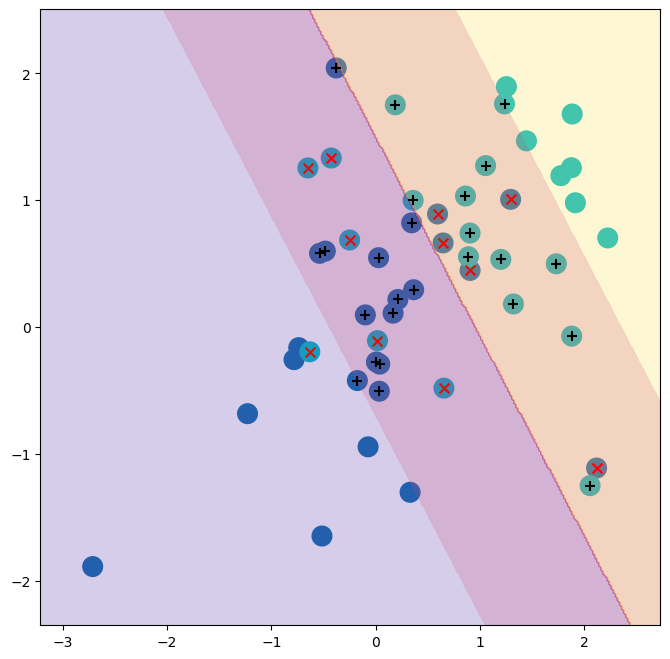

In [6]:
#decrese the cost, show large margin, more support vectors
svm_linear_small = SVC(C=0.1, kernel='linear')

svm_linear_small.fit(X, y)

fig, ax = subplots(figsize=(8,8))
plot_svm(X, 
         y,
         svm_linear_small,
         ax=ax)

In [7]:
svm_linear.coef_

array([[1.17303943, 0.77348227]])

In [8]:
#Kfold, find best C
kfold = skm.KFold(5, random_state=0, shuffle=True)
grid = skm.GridSearchCV(svm_linear, {'C':[0.001,0.01,0.1,1,5,10,100]}, refit=True, cv=kfold, scoring='accuracy')
grid.fit(X, y)
grid.best_params_

{'C': 1}

In [9]:
grid.cv_results_[('mean_test_score')]

array([0.46, 0.46, 0.72, 0.74, 0.74, 0.74, 0.74])

In [10]:
#generate the test samples and assess the best model
X_test = rng.standard_normal((20,2))
y_test = np.array([-1]*10+[1]*10)
X_test[y_test==1] += 1

In [11]:
best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,-1,1
Predicted,,
-1,8,4
1,2,6


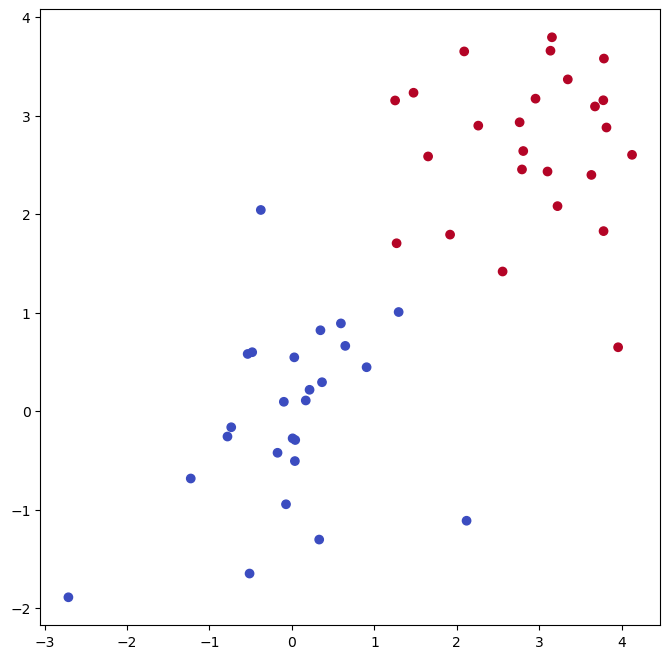

In [12]:
#Check for linearly separable samples
X[y==1] += 1.9
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


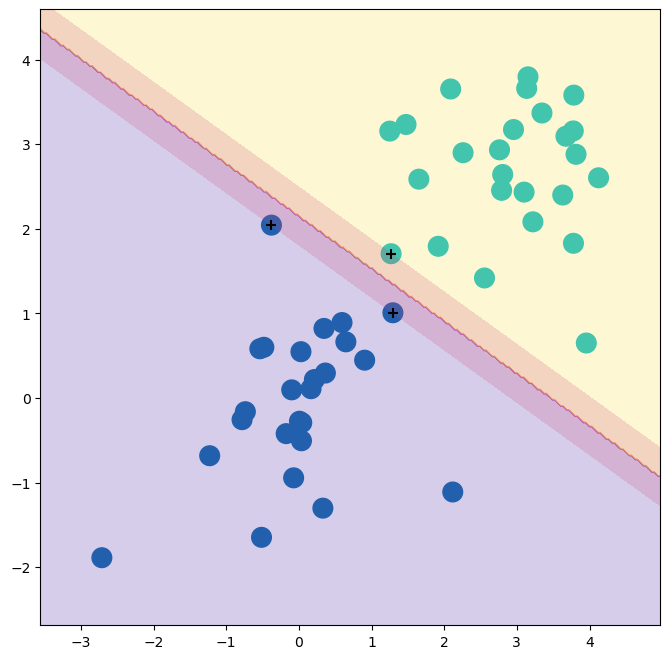

In [13]:
svm_ = SVC(C=1e5, kernel='linear').fit(X,y)
fig, ax = subplots(figsize=(8,8))
plot_svm(X, 
         y,
         svm_,
         ax=ax)
y_hat = svm_.predict(X)
confusion_table(y_hat, y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


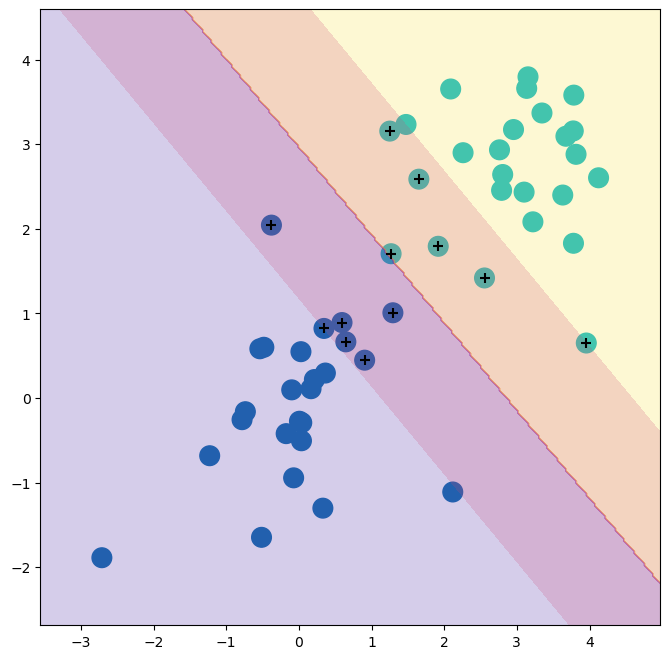

In [14]:
svm_ = SVC(C=0.1, kernel='linear').fit(X,y)
fig, ax = subplots(figsize=(8,8))
plot_svm(X, 
         y,
         svm_,
         ax=ax)
y_hat = svm_.predict(X)
confusion_table(y_hat, y)

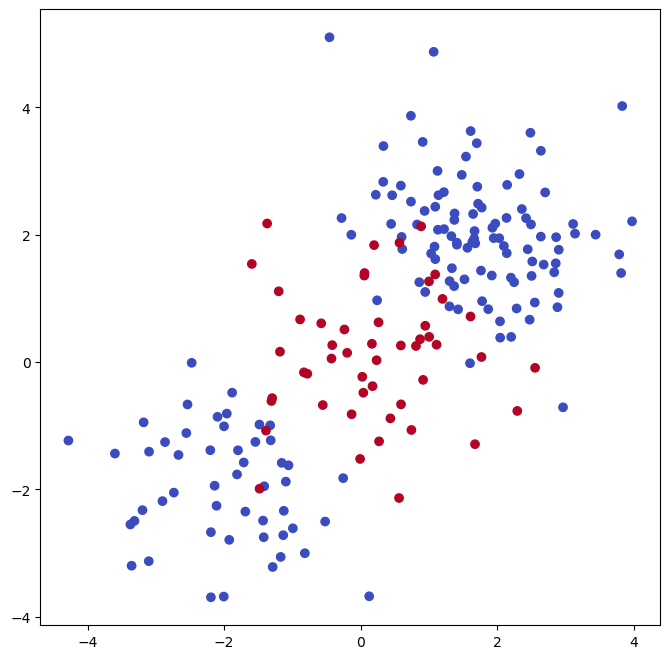

In [15]:
#use different non-linear kernel
X = rng.standard_normal((200,2))
X[:100] += 2
X[100:150] -= 2
y = np.array([1]*150+[2]*50)

fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm)

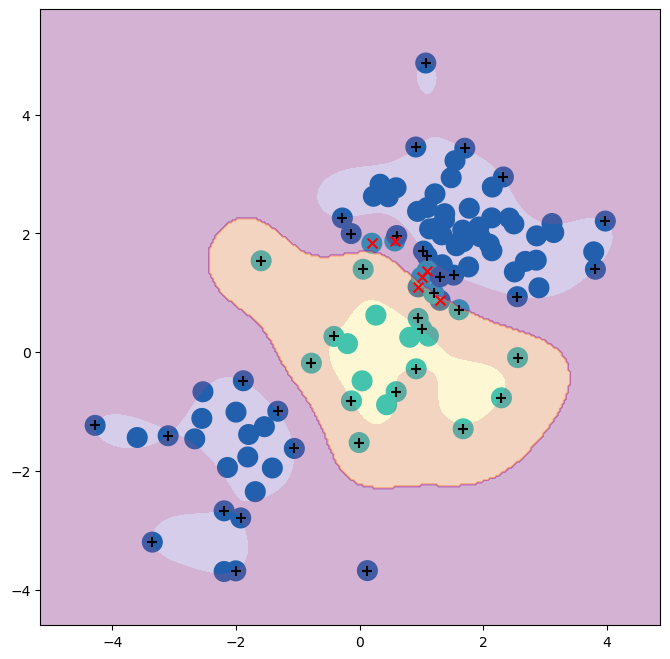

In [16]:
#use radial kernel
(X_train, X_test, y_train, y_test) = skm.train_test_split(X, y, test_size=0.5, random_state=0)
svm_rbf = SVC(C=1, kernel='rbf', gamma=1).fit(X_train, y_train)

fig, ax = subplots(figsize=(8,8))
plot_svm(X_train, y_train, svm_rbf, ax=ax)

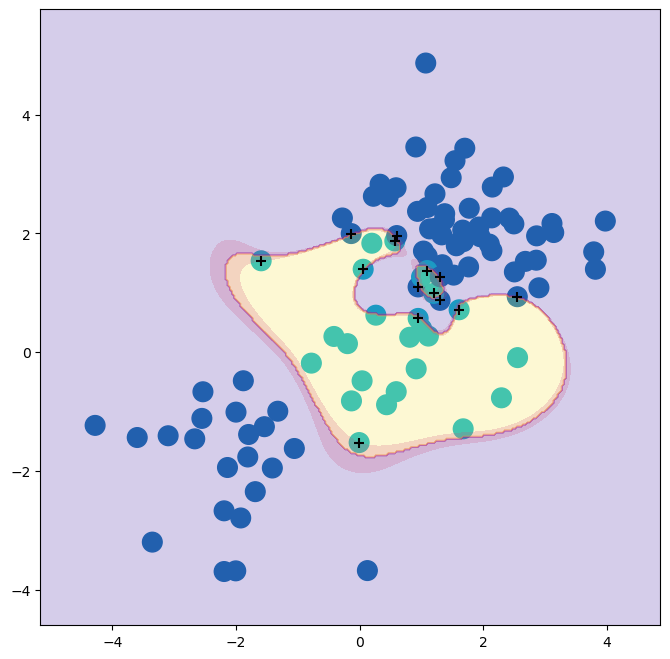

In [17]:
#use larger C, reduce the trainning error, may overfitting
svm_rbf = SVC(C=1e5, kernel='rbf', gamma=1).fit(X_train, y_train)

fig, ax = subplots(figsize=(8,8))
plot_svm(X_train, y_train, svm_rbf, ax=ax)

In [18]:
#Kfold, find best C
kfolf = skm.KFold(5, random_state=0, shuffle=True)
grid = skm.GridSearchCV(svm_rbf,
                        {'C':[0.1,1,10,100,1000], 'gamma':[0.5,1,2,3,4]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_params_

{'C': 1, 'gamma': 0.5}

Truth,1,2
Predicted,,
1,69,6
2,6,19


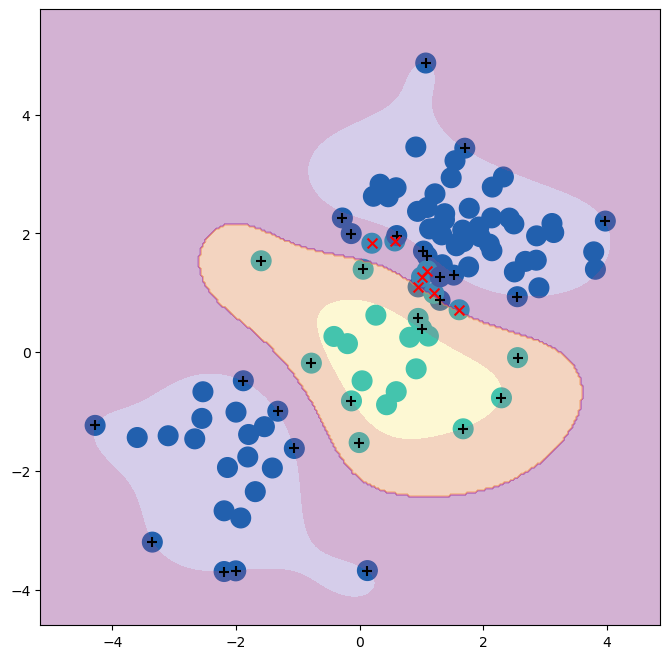

In [19]:
#test
best_svm = grid.best_estimator_

fig, ax = subplots(figsize=(8,8))
plot_svm(X_train, y_train, best_svm, ax=ax)

y_hat_test = best_svm.predict(X_test)
confusion_table(y_hat_test, y_test)

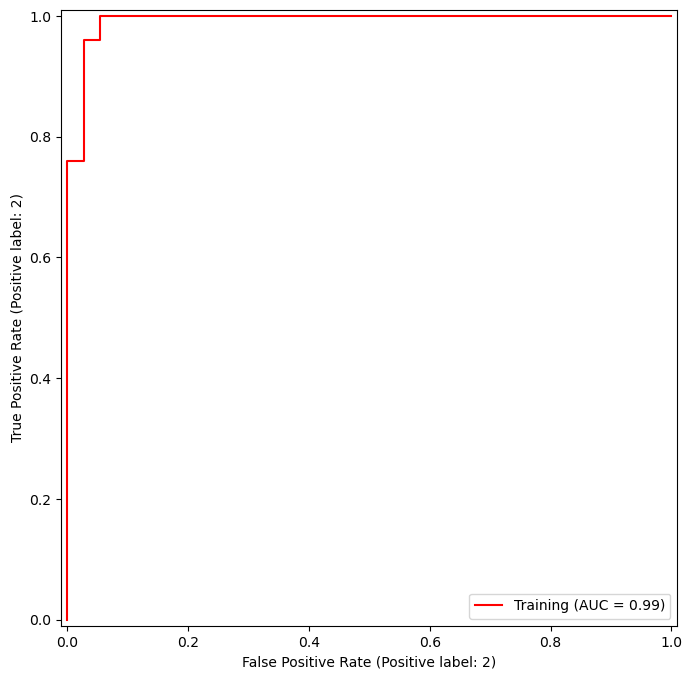

In [20]:
#ROC curve
fig, ax = subplots(figsize=(8,8))
roc_curve(best_svm, X_train, y_train, name='Training', color='r', ax=ax)

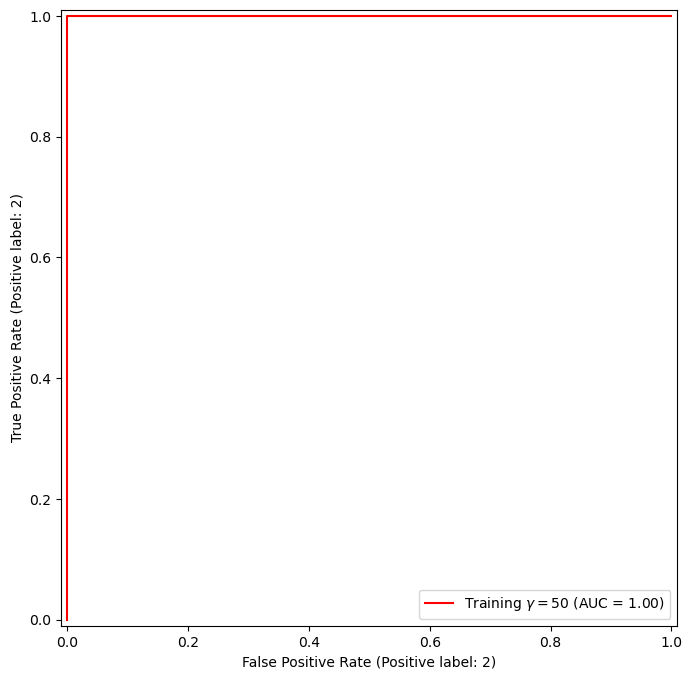

In [21]:
svm_flex = SVC(kernel='rbf', gamma=50, C=1)
svm_flex.fit(X_train, y_train)
fig, ax = subplots(figsize=(8,8))
roc_curve(svm_flex, X_train, y_train, name='Training $\gamma=50$', color='r', ax=ax)

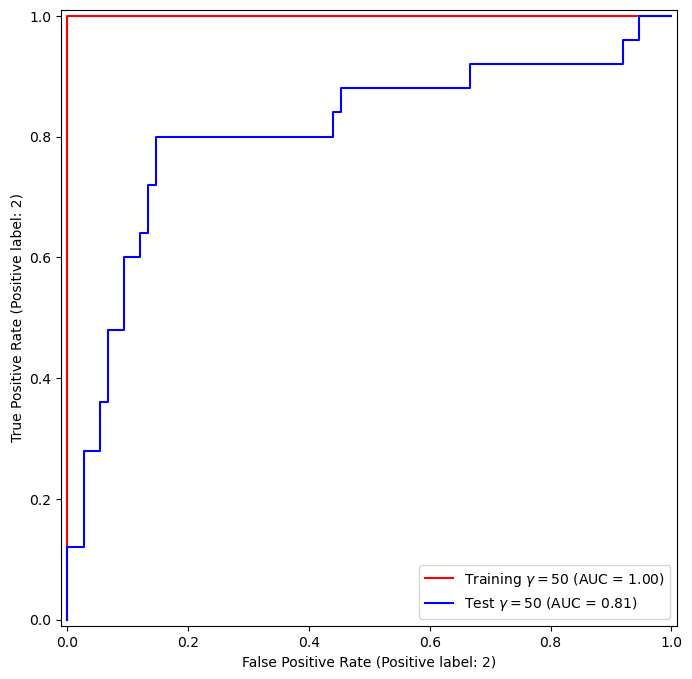

In [22]:
#ROC curve for test data
roc_curve(svm_flex, X_test, y_test, name='Test $\gamma=50$', color='b', ax=ax)
fig

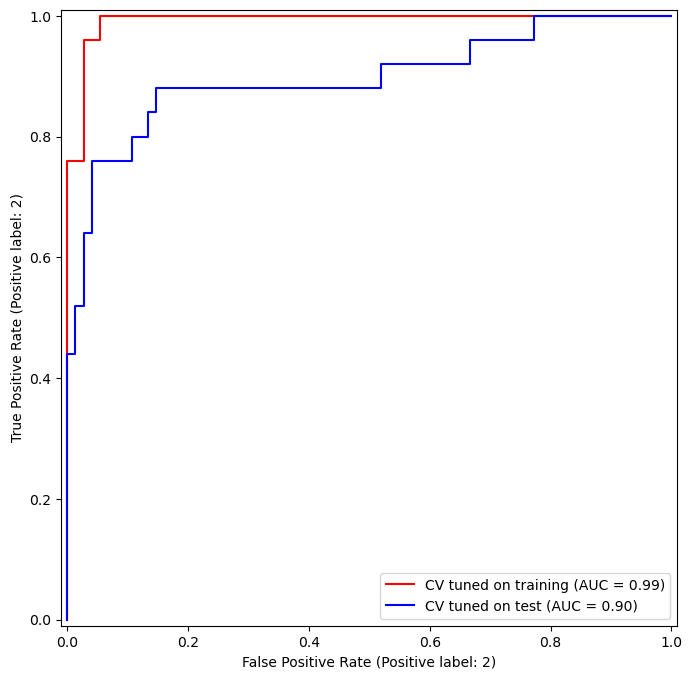

In [23]:
#Look at tuned SVM, better
fig, ax = subplots(figsize=(8,8))
for (X_, y_, c, name) in zip((X_train, X_test), (y_train, y_test), ('r', 'b'), ('CV tuned on training', 'CV tuned on test')):
    roc_curve(best_svm, X_, y_, name=name, ax=ax, color=c)

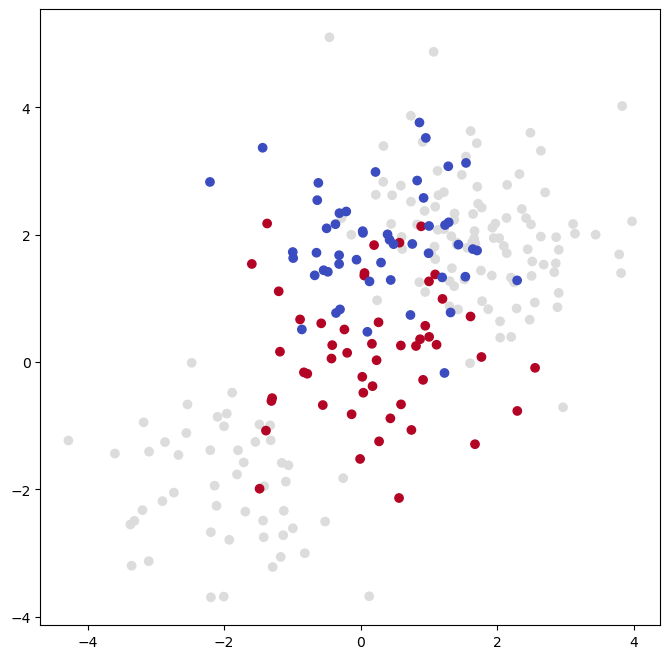

In [24]:
#SVM with Multiple Classes
rng = np.random.default_rng(123)
X = np.vstack([X, rng.standard_normal((50,2))])
y = np.hstack([y, [0]*50])
X[y==0,1] += 2
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm)

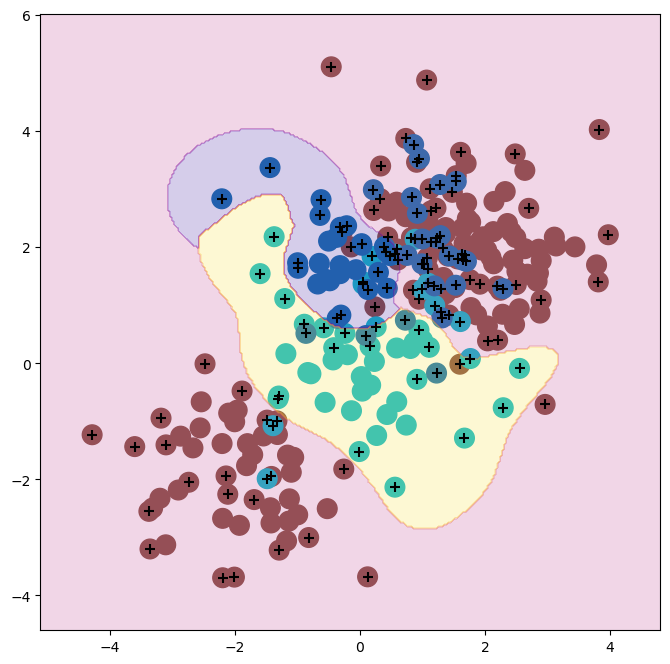

In [54]:
#perform multi-class classification using either one-versus-one('ovo') or one-versus-rest('ovr')
svm_rbf_3 = SVC(kernel='rbf', C=10, gamma=1, decision_function_shape='ovo').fit(X, y)
fig, ax = subplots(figsize=(8,8))
plot_svm(X, y, svm_rbf_3, scatter_cmap=cm.tab10, ax=ax)

In [62]:
#examine Khan data set: consists of a number of tissue samples corresponding to four distinct types of small round blue cell tumors.
#This data set consists of expression measurements for 2308 genes, training and testing sets consist 63 and 20 observations.
Khan = load_data('Khan')
Khan['xtrain'].shape, Khan['xtest'].shape

((63, 2308), (20, 2308))

In [74]:
khan_linear = SVC(kernel='linear', C=10)
khan_linear.fit(Khan['xtrain'], Khan['ytrain'])
confusion_table(khan_linear.predict(Khan['xtrain']), Khan['ytrain'])
#note: no training errors. since large variables relatives to obervarions

Truth,1,2,3,4
Predicted,,,,
1,8,0,0,0
2,0,23,0,0
3,0,0,12,0
4,0,0,0,20


In [76]:
confusion_table(khan_linear.predict(Khan['xtest']), Khan['ytest'])

Truth,1,2,3,4
Predicted,,,,
1,3,0,0,0
2,0,6,2,0
3,0,0,4,0
4,0,0,0,5
